# Deep Learning &mdash; Assignment 1

First assignment for the 2024 Deep Learning course (NWI-IMC070) of the Radboud University.

-----

**Names: Andrew Schroeder and Fynn Gerding**

**Group: 17**

-----

**NOTE FOR TA MARKING ASSIGNMENT**  
In some of the answers to the questions I wrote the results from a particular training run when I initially did the assignment. After completing the assignment and running all cells again the results can sometimes slightly differ a bit from what I wrote in the answer.

**Instructions:**
* Fill in your names and the name of your group.
* Answer the questions and complete the code where necessary.
* Keep your answers brief, one or two sentences is usually enough.
* Re-run the whole notebook before you submit your work.
* Save the notebook as a PDF and submit that in Brightspace together with the `.ipynb` notebook file.
* The easiest way to make a PDF of your notebook is via File > Print Preview and then use your browser's print option to print to PDF.

## Objectives

In this assignment you will
1. Experiment with gradient descent optimization;
2. Derive and implement gradients for binary cross-entropy loss, the logistic sigmoid function and a linear layer;
3. Test your gradient implementations with the finite difference method;
4. Use these components to implement and train a simple neural network.

In [207]:
%matplotlib inline
import numpy as np
import scipy.optimize
import sklearn.datasets
import matplotlib.pyplot as plt
import torch

np.set_printoptions(suppress=True, precision=6, linewidth=200)
plt.style.use('ggplot')

**Fonts Sizes**
<style>
    /* Change the overall font size of the notebook */
    body {
        font-size: 6pt;
    }

    /* Adjust the font size of code cells */
    .CodeMirror {
        font-size: 6pt;
    }

    /* Adjust the font size of markdown cells */
    div.text_cell_render {
        font-size: 6pt;
    }
</style>


## 1.1 Gradient descent optimization (6 points)

Consider the following function with two parameters and its partial derivatives:
\begin{align}
  f(x, y) &= x^2 + y^2 + x (y + 2) + \cos(3x) \\
  \frac{\partial f}{\partial x} &= 2x - 3\sin(3x) + y + 2 \\
  \frac{\partial f}{\partial y} &= x + 2y \\
\end{align}

In [208]:
def f(x, y):
    return x ** 2 + y ** 2 + x * (y + 2) + np.cos(3 * x)
def grad_x_f(x, y):
    return 2 * x - 3 * np.sin(3 * x) + y + 2
def grad_y_f(x, y):
    return x + 2 * y

A plot of the function shows that it has multiple local minima:

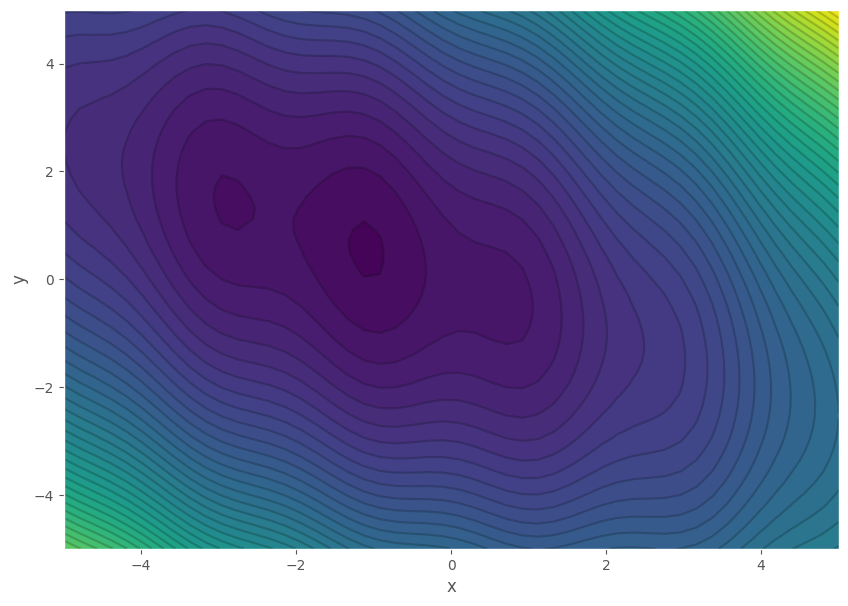

In [209]:
def plot_f_contours():
    xx, yy = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
    zz = f(xx, yy)
    plt.contourf(xx, yy, zz, 50)
    plt.contour(xx, yy, zz, 50, alpha=0.2, colors='black', linestyles='solid')
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(10, 7))
plot_f_contours()

### Implement gradient descent

We would like to find the minimum of this function using gradient descent.

**(a) Implement the gradient descent updates for $x$ and $y$ in the function below:<span style="float:right"> (1 point)</span>**

In [210]:
def optimize_f(x, y, step_size, steps):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]

    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at the current point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        x = x - step_size*dx
        y = y - step_size*dy
        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

In [211]:
# The following assert statements check that your implementation behaves sensibly
# Use it to get a hint only if you are stuck.
assert optimize_f(3, 2, 0.1, 1)[0] != 3, "Hint: you are not changing `x`"
assert optimize_f(3, 2, 0.1, 1)[2] < f(3, 2), "Hint: the function value is increasing, you should be minimizing it, not maximizing."
assert abs(optimize_f(3, 2, 0.1, 1)[0] - 3) < 1, "Hint: you are probably taking steps that are too large."

### Tune the parameters

We will now try if our optimization method works.

Use this helper function to plot the results:

In [212]:
# helper function that plots the results of the gradient descent optimization
def plot_gradient_descent_results(x, y, val, x_hist, y_hist):
    # plot the path on the contour plot
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plot_f_contours()
    plt.plot(x_hist, y_hist, '.-')
    
    # plot the learning curve
    plt.subplot(1, 2, 2)
    plt.plot(f(np.array(x_hist), np.array(y_hist)), '.r-')
    plt.title('Minimum value: %f' % f(x_hist[-1], y_hist[-1]))
    plt.show()

**(b) Run the gradient descent optimization with the following initial settings:**

``x=3, y=2, step_size=0.1, steps=10``

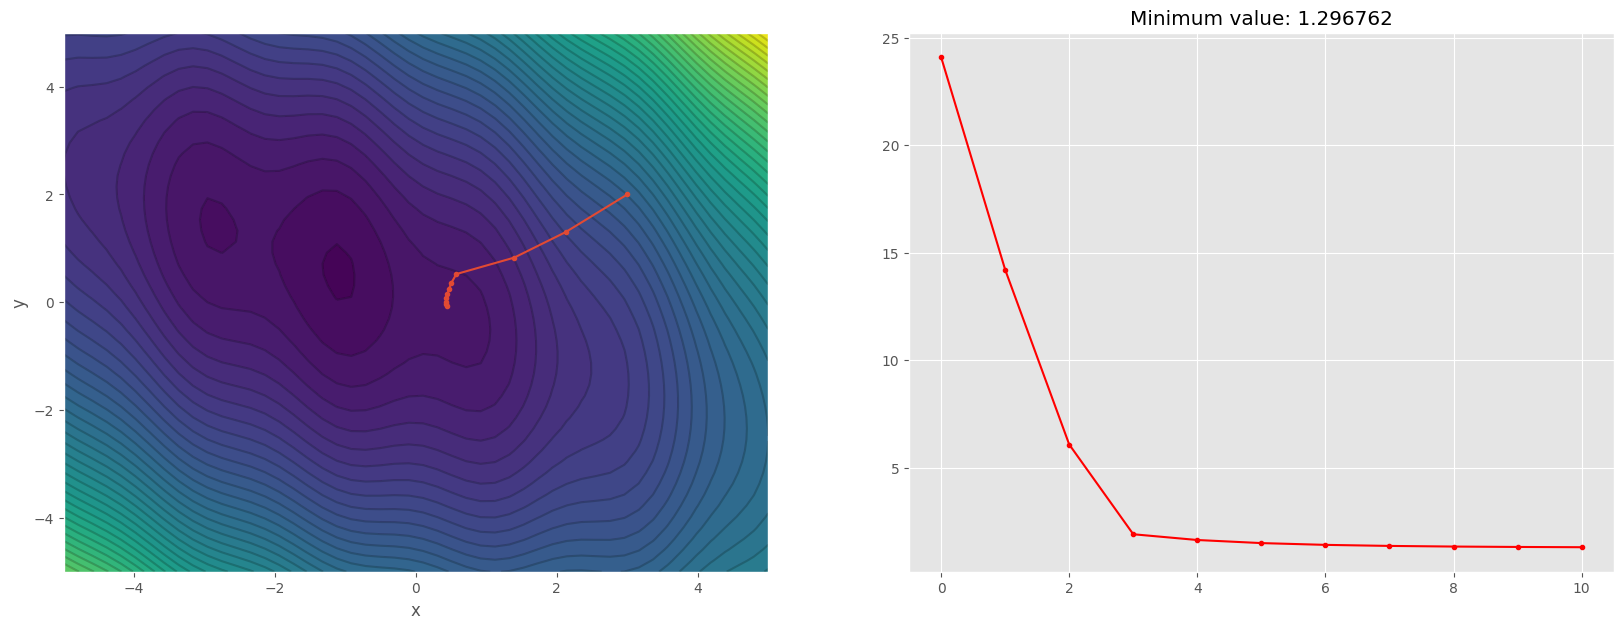

In [213]:
results = optimize_f(x=3, y=2, step_size=0.1, steps=10)
plot_gradient_descent_results(*results)

**(c) Does it find the minimum of the function? What happens?<span style="float:right"> (1 point)</span>**

TODO: It doesn't quite find the minimum though it gets close. It seems that it gets trapped in a "flat" area and there isn't really a gradient in that location, near the end it seems to move away from the minimum in the left plot. 

**(d) Try a few different values for the `step_size` and the number of `steps` to get close to the optimal solution:**

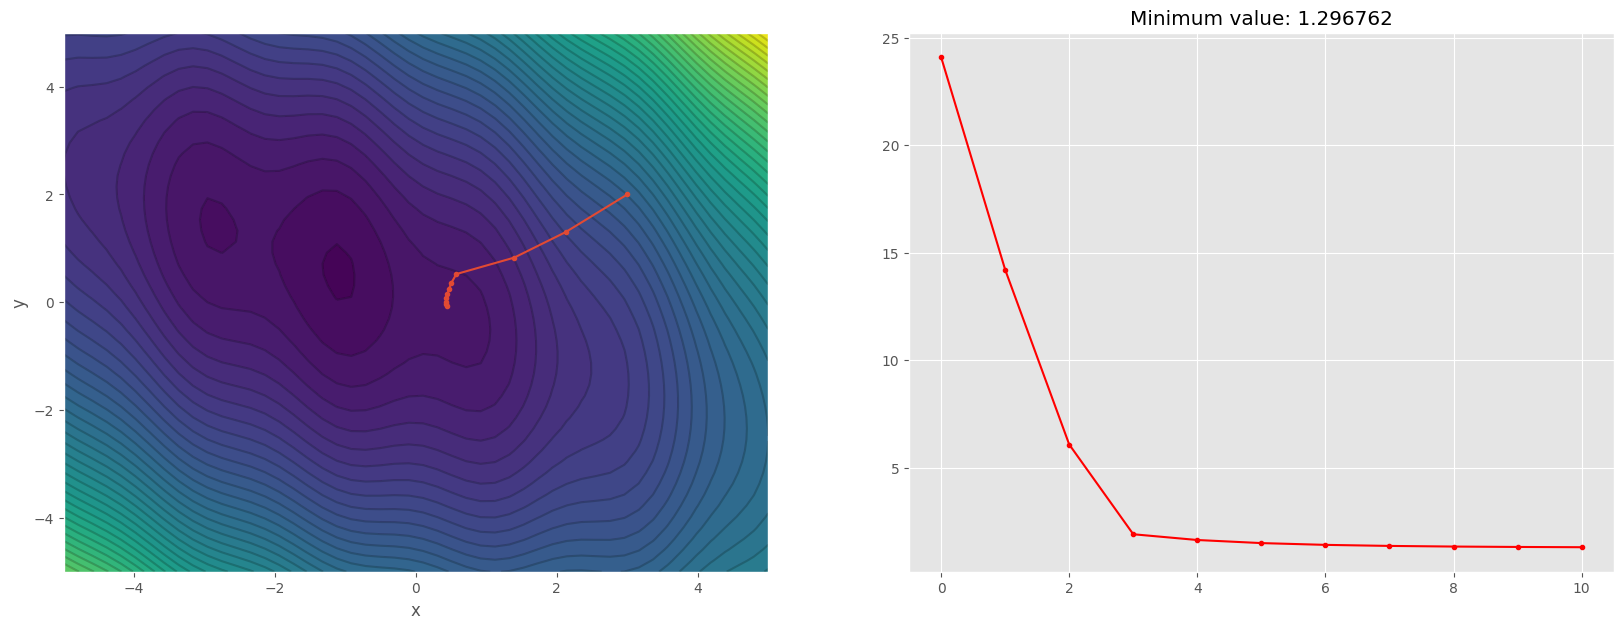

Steps: 10 Step Size: 0.1
Results[2]: 1.2967615849902097
You should have a better result


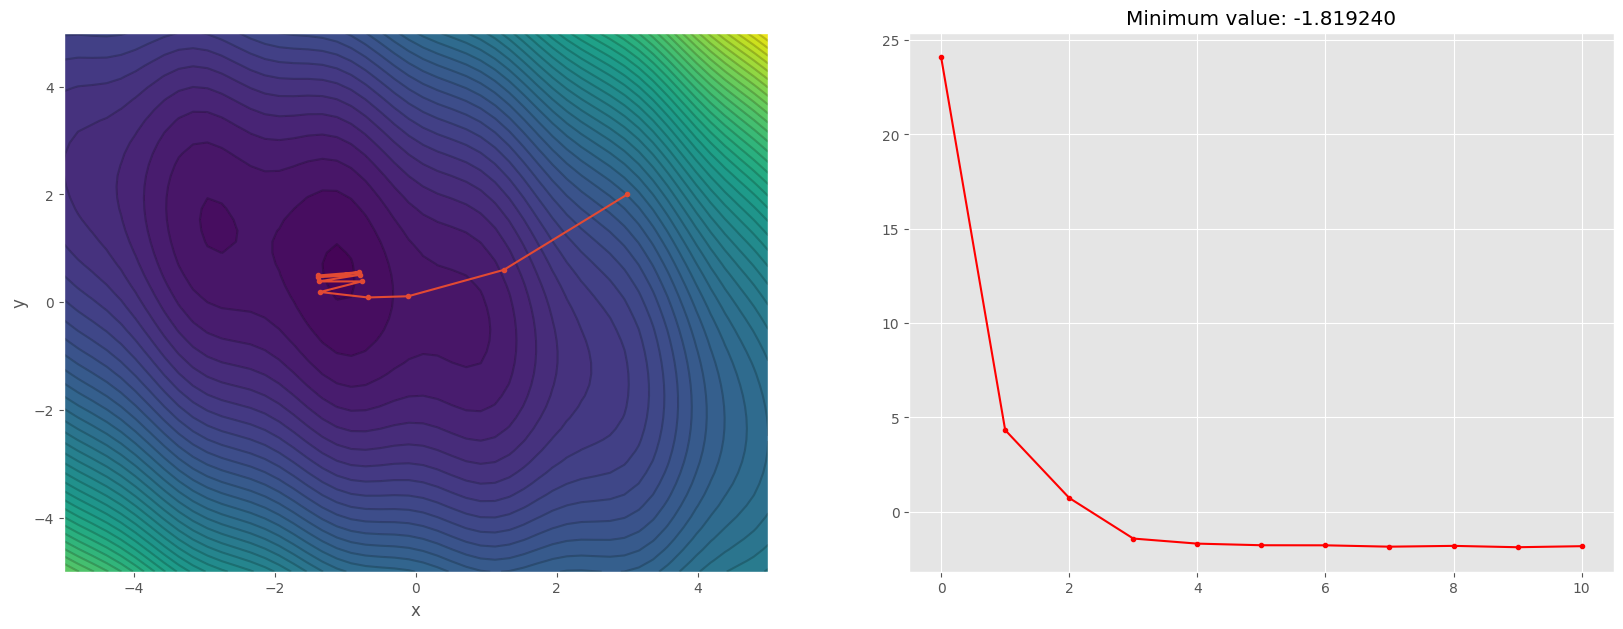

Steps: 10 Step Size: 0.2
Results[2]: -1.819240328427473


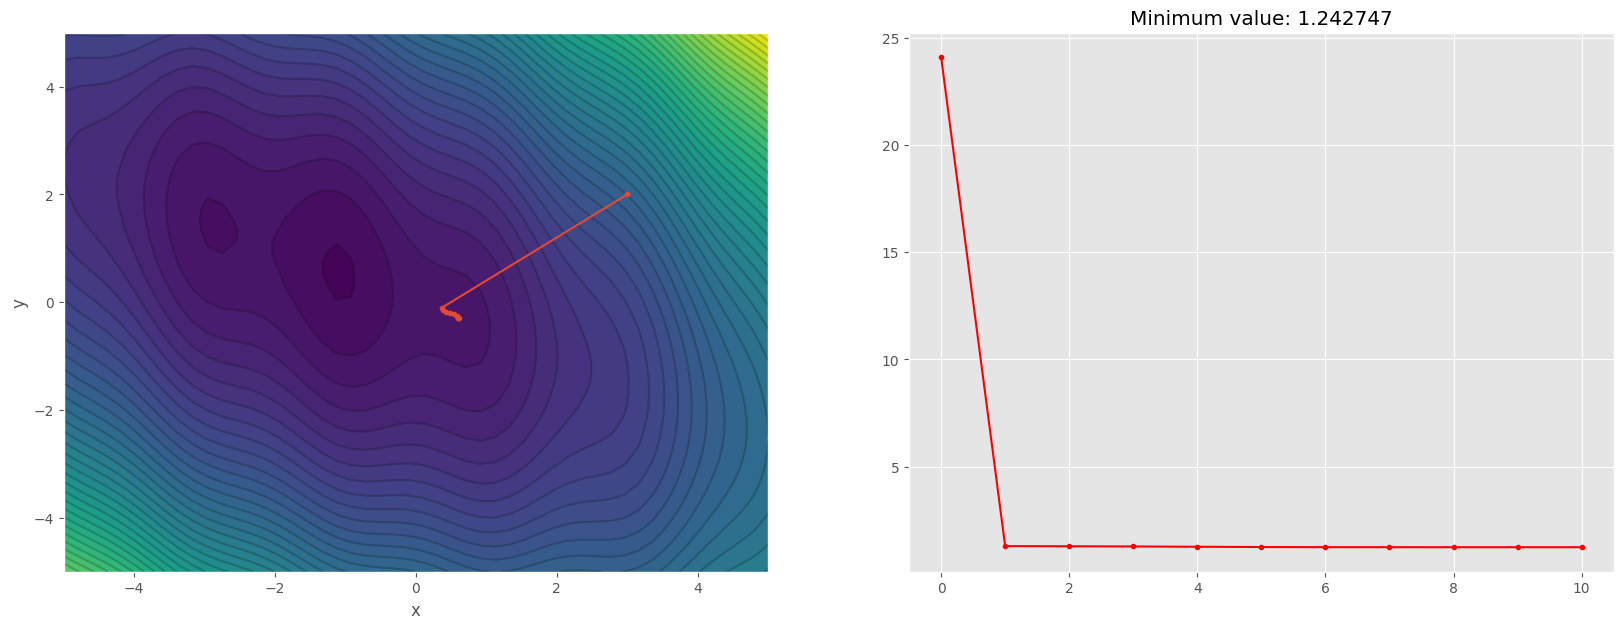

Steps: 10 Step Size: 0.30000000000000004
Results[2]: 1.2427467219182857
You should have a better result


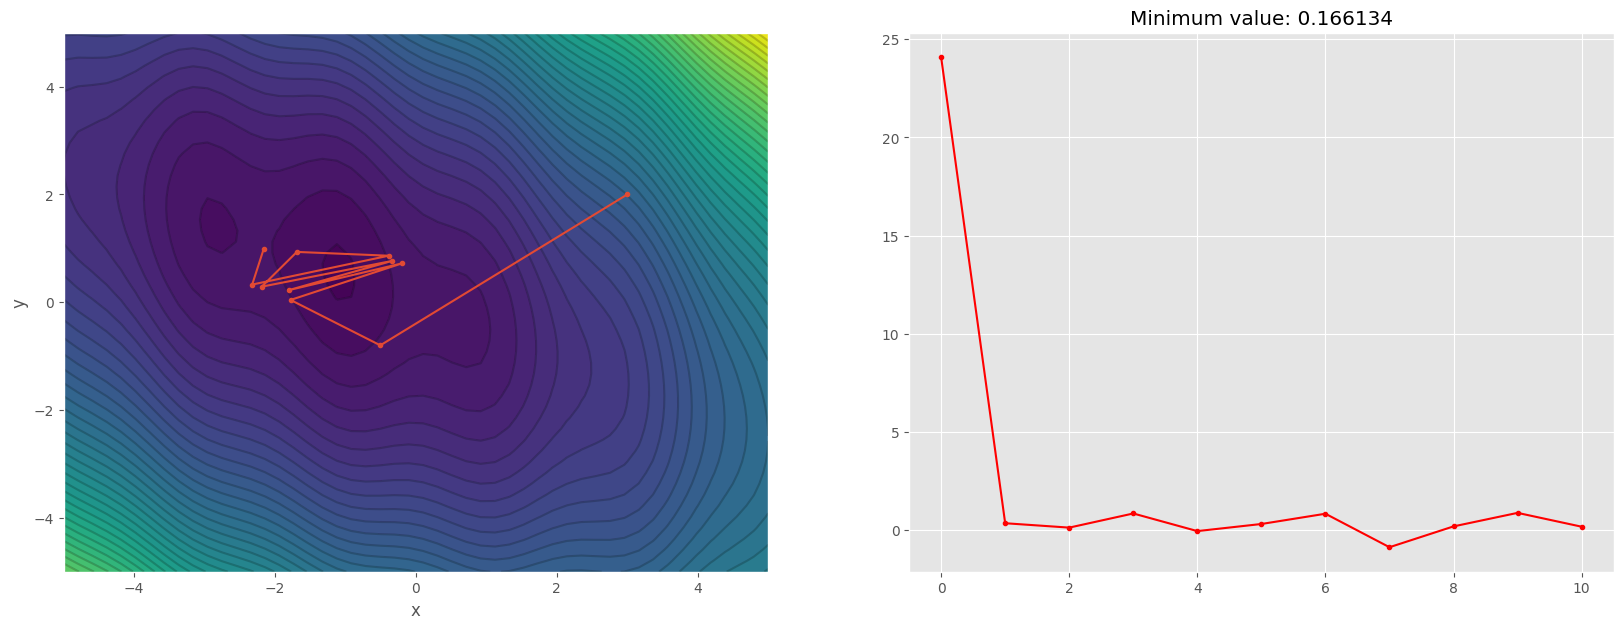

Steps: 10 Step Size: 0.4
Results[2]: 0.16613445522356196
You should have a better result


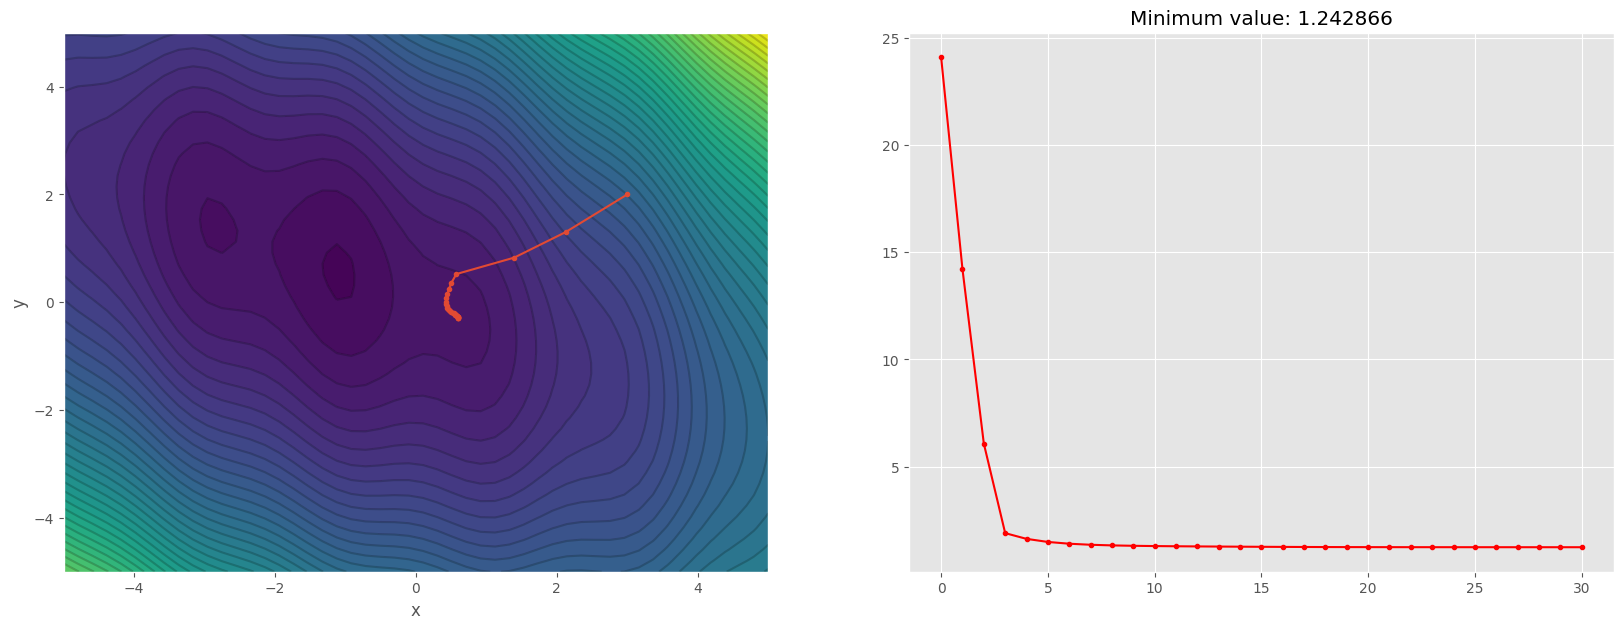

Steps: 30 Step Size: 0.1
Results[2]: 1.242865937264679
You should have a better result


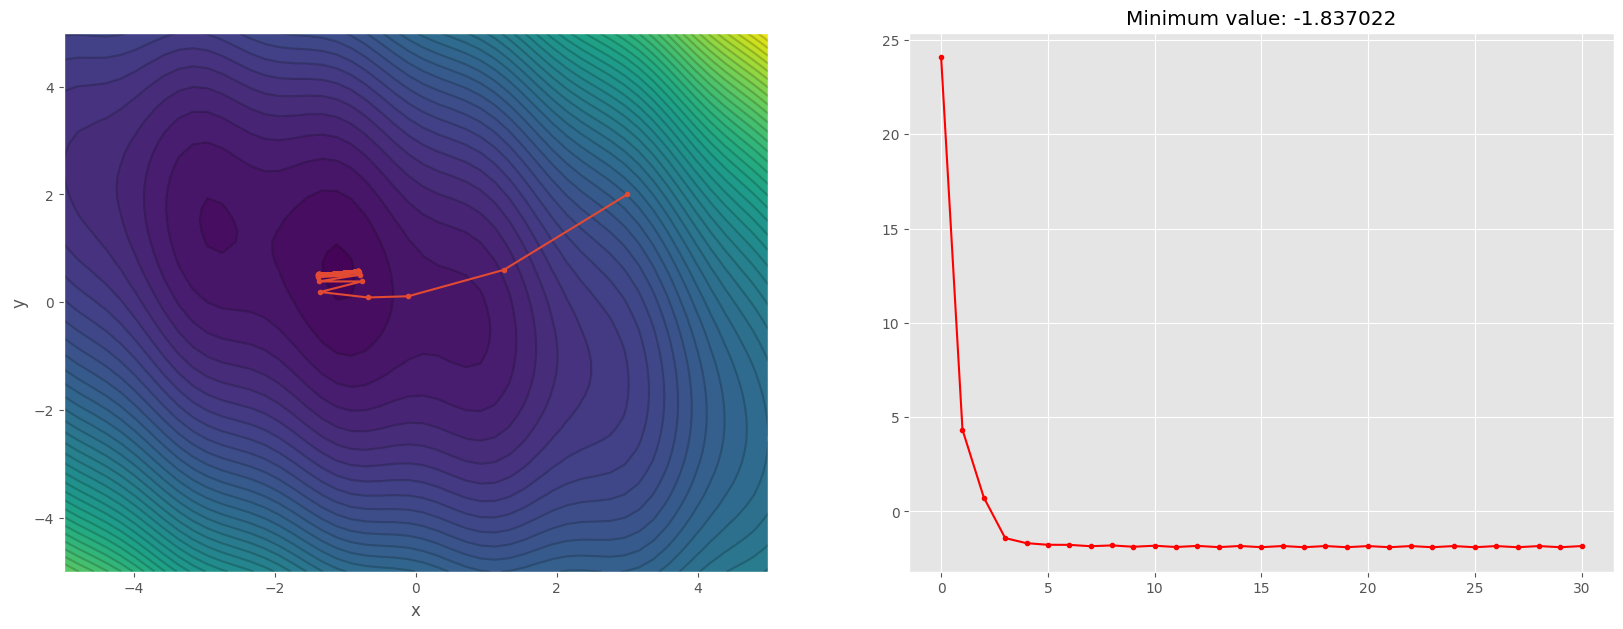

Steps: 30 Step Size: 0.2
Results[2]: -1.8370219660528102


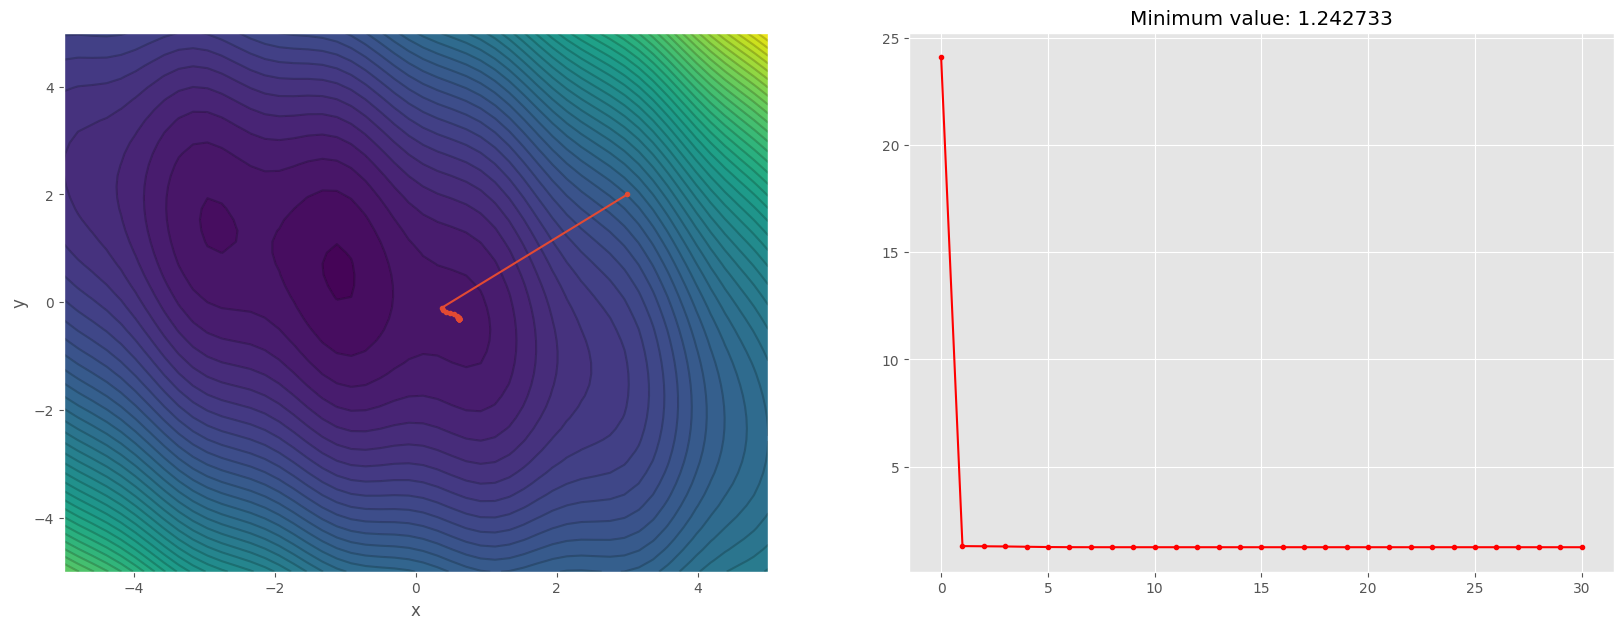

Steps: 30 Step Size: 0.30000000000000004
Results[2]: 1.242733394931912
You should have a better result


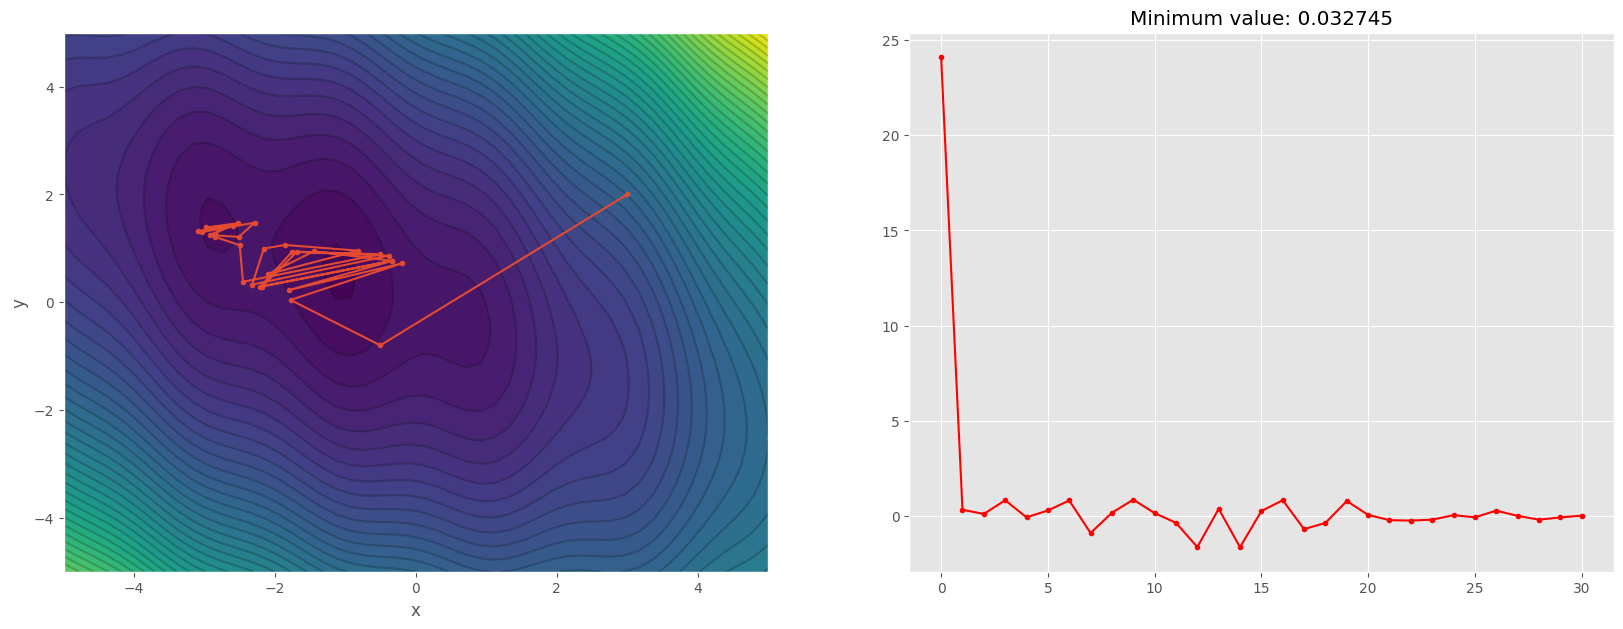

Steps: 30 Step Size: 0.4
Results[2]: 0.032745026436709956
You should have a better result


In [214]:
# TODO: tune the parameters to find a better optimum

step_list = np.arange(10, 50, 20, dtype=int)
step_sizes_list = np.arange(0.1, 0.5, 0.1)

for num_steps in step_list:
    for step_size in step_sizes_list:
        results = optimize_f(x=3, y=2, step_size=step_size, steps=int(num_steps))

        plot_gradient_descent_results(*results)
        print(f"Steps: {num_steps} Step Size: {step_size}")
        print(f"Results[2]: {results[2]}")

        if results[2] > -1.5:
            print("You should have a better result")


**(e) What happens if you set the step size too small? And what if it is too large?<span style="float:right"> (1 point)</span>**

If the step size is too small then it takes forever to get to the minimum and may not reach it unless we have many steps. If it is too large then it oscillates around the minimum.

**(f) Were you able to find a step size that reached the global optimum? If not, why not?<span style="float:right"> (1 point)</span>**

Yes I found the following global optimum/minimum with these parameter:  
Steps: 10  
Step Size: 0.2  
Results[2]: -1.819240328427473

### Implement a decreasing step size

You might get better results if you use a step size that is large at the beginning, but slowly decreases during the optimization.

Try the following scheme to compute the step size $\eta_t$ in step $t$, given a decay parameter $d$:
\begin{align}
  \eta_t = \eta_0 d^t
\end{align}

**(g) Update your optimization function to use this step size schedule:<span style="float:right"> (1 point)</span>**

In [215]:
def optimize_f(x, y, step_size, steps, decay=1.0):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]

    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at this point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        step_size = step_size*decay**step
        x = x - step_size*dx
        y = y - step_size*dy

        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

In [216]:
# The following assert statement checks that your implementation behaves sensibly
_trace = optimize_f(0.123, 0.456, 0.01, 2, 0.1)[3]
assert abs(_trace[1] - _trace[0]) > 5 * abs(_trace[2] - _trace[1]), "Hint: step size should be decreasing"
del _trace

**(h) Tune the `step_sizes`, `steps` and `decay` parameters to get closer to the global minimum:<span style="float:right"> (1 point)</span>**

In [217]:
# TODO: tune the parameters to find the global optimum

step_sizes = np.arange(0.1, 1, 0.1)
steps = np.arange(10,100,10)
decays = np.arange(0.1, 1, 0.1)

found = False
for step_size in step_sizes:
    for num_steps in steps:
        for decay in decays:
            results = optimize_f(x=3, y=2, step_size=step_size, steps=num_steps, decay=decay)

            if results[2] < -2:
                print(f"Step_size:{step_size}, Num_steps:{num_steps}, Decay:{decay}")
                found = True
                break
        if found == True:
            break
    if found == True:
        break


Step_size:0.2, Num_steps:10, Decay:0.9


In [218]:
assert results[2] < -2, "Hint: get closer to the optimum"

We will now look at some more complex functions that we can try to optimize.

## 1.2 Computing gradients with PyTorch (0 points)

It is inconvenient to define compute derivatives and gradients by hand.
Fortunately, the [PyTorch](https://pytorch.org/) framework can do this for us.

PyTorch works very similarly to Numpy, but it has its own type of multi dimensional arrays, called `torch.Tensor`.

### Computing the gradients of a simple model

You can use the PyTorch tensors to perform computations, such as the function $y = x \cdot w + b$:

In [219]:
w = torch.tensor(2.)
b = torch.tensor(1.)
x = torch.tensor(5.)
print('w:', w)
print('b:', b)
print('x:', x)

y = x * w + b
print("y:", y)

w: tensor(2.)
b: tensor(1.)
x: tensor(5.)
y: tensor(11.)


If we would like to compute the gradient for the parameters `w` and `b`, we could derive and compute them manually:

In [220]:
grad_y_y = torch.tensor(1.)
grad_w_y = grad_y_y * x
grad_b_y = grad_y_y
print('grad_w_y:', grad_w_y)
print('grad_b_y:', grad_b_y)

grad_w_y: tensor(5.)
grad_b_y: tensor(1.)


### Computing the gradient automatically

You can compute an automatic gradient as follows:

1. Tell PyTorch which variables need a gradient. You can do this by setting `requires_grad=True` when you define the variable.
2. Perform a computation.
3. Call the `backward()` function on the result to compute the gradients.
4. The `.grad` field of your variables will now contain the gradient.

Have a look at this example, and compare the gradients with the gradients we computed manually:

In [221]:
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
x = torch.tensor(5.)

# compute the function
y = x * w + b

# compute the gradients dy_dθ for all variables θ. Compute gradients W.R.T output y.
y.backward() 

# w.grad is the grad_w_y - 
print('w.grad:', w.grad)
print('b.grad:', b.grad)
# x did not have requires_grad, so no gradient was computed
print('x.grad:', x.grad)

w.grad: tensor(5.)
b.grad: tensor(1.)
x.grad: None


This also works for much more complicated functions, and even entire neural networks as you will see later:

In [222]:
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
x = torch.tensor(5.)

y = torch.exp(torch.sin(x * w) + b)
y.backward()

print('w.grad:', w.grad)
print('b.grad:', b.grad)

w.grad: tensor(-6.6191)
b.grad: tensor(1.5777)


Note that `backward()` *adds* to `.grad`. So if you call it twice you get double the gradient. If you do not want this you need to reset the gradients yourself. We will see this later.

In [223]:
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
x = torch.tensor(5.)

y = torch.exp(torch.sin(x * w) + b)
y.backward()

print('w.grad:', w.grad)
print('b.grad:', b.grad)

# Again
y = torch.exp(torch.sin(x * w) + b)
y.backward()

print()
print('w.grad:', w.grad)
print('b.grad:', b.grad)

# Again but this time reset the gradient before hand. 
w.grad = b.grad = None
y = torch.exp(torch.sin(x * w) + b)
y.backward()

print()
print('w.grad:', w.grad)
print('b.grad:', b.grad)

w.grad: tensor(-6.6191)
b.grad: tensor(1.5777)

w.grad: tensor(-13.2382)
b.grad: tensor(3.1554)

w.grad: tensor(-6.6191)
b.grad: tensor(1.5777)


### A note on working with vectors, matrices, and tensors

In Pytorch all operations work pointwise, so for example:

In [224]:
torch.tensor([1,2]) * torch.tensor([3,4])

tensor([3, 8])

This is a pointwise product, not a vector dot product or a matrix product.

To compute a inner product (vector/matrix, matrix/matrix, or vector/vector dot product), use the `@` operator:

In [225]:
print(torch.tensor([1,2]) @ torch.tensor([3,4]))
print(torch.tensor([1,2]) @ torch.tensor([[3,4,5],[6,7,8]]))

tensor(11)
tensor([15, 18, 21])


Sometimes you want to combine two tensors with different shapes, usually when one has a lower rank. Say you want to add 1 to all elements of a tensor, you can just write:

In [226]:
torch.tensor([1,2]) + 1

tensor([2, 3])

But this only works if the last dimensions in the shape are the same.

In [227]:
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([1,10])
print(a.shape)
print(b.shape)
#print(a + b) # This fails

torch.Size([2, 3])
torch.Size([2])


We can make it clear that we want to copy `b` along the second dimension by writing `b[:,None]`. The `:` means to keep that dimension as is, `None` means to copy along this new dimension.

In [228]:
print(b[:,None].shape)
print(a + b[:,None])
print(b[None,:].shape)
print(a.transpose(0,1) + b[None,:])

# Don't get this.
# a.shape is (2, 3)
# b.shape is (2, 1)
# The last dimensions don't add up! But pytorch is smart and interprets the 1 dimension appropriately. If the number of columns 
# in b was not 1 then the last dimensions would have to line up.

torch.Size([2, 1])
tensor([[ 2,  3,  4],
        [14, 15, 16]])
torch.Size([1, 2])
tensor([[ 2, 14],
        [ 3, 15],
        [ 4, 16]])


## 1.3 Neural network components (6 points)

In this part of the assignment, we will implement a simple neural network from scratch. We need four components:
1. A logistic sigmoid activation function,
2. A ReLU activation function,
3. A binary cross-entropy loss function,
4. A multi-layer neural network

For each of these components we will have to implement the function. You can use the book or the slides as a reference.

### Logistic-sigmoid activation function

The logistic-sigmoid function is defined as:

\begin{align}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
\end{align}

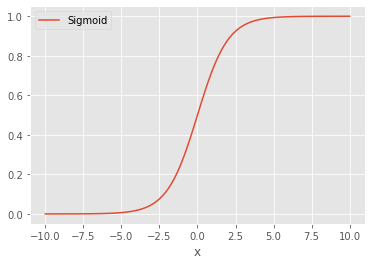

**(a) Implement the logistic sigmoid in the function `sigmoid(x)`:<span style="float:right"> (1 point)</span>**

In [229]:
import math
def sigmoid(x):
    return 1/(1+math.e**(-x))

# try with some random inputs
torch.manual_seed(12345)
x = 10 * (torch.rand(5) - 0.5)
print('x:', x)
print('sigmoid(x):', sigmoid(x))

# Try with some extreme inputs
assert sigmoid(torch.tensor(0)) == 0.5
assert sigmoid(torch.tensor(-100)) == 0
assert sigmoid(torch.tensor(100)) == 1

x: tensor([ 4.8172,  3.7961,  4.9214, -0.3893, -4.1678])
sigmoid(x): tensor([0.9920, 0.9780, 0.9928, 0.4039, 0.0152])


### Rectified linear units (ReLU)

The rectified linear unit is defined as:
\begin{align}
  f(x) = \max(0, x)
\end{align}

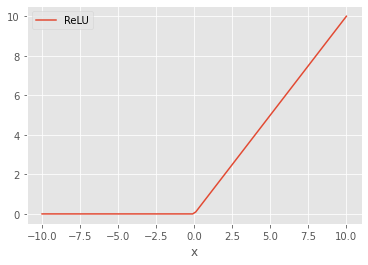

**(b) Implement the ReLU function in the functions `relu(x)`: <span style="float:right"> (1 points)</span>**

In [230]:
def relu(x: torch.Tensor):
    return torch.max(x, torch.tensor(0))

# try with some random inputs
torch.manual_seed(12345)
print(type(torch.tensor(2)))
x = 10 * (torch.rand(5) - 0.5)
print('x:', x)
print('relu(x):', relu(x))

# Check properties
assert all(relu(x) >= 0)
assert relu(x).shape == x.shape
assert relu(torch.tensor(0)) == 0
assert relu(torch.tensor(-5)) == 0
assert relu(torch.tensor(5)) == 5

<class 'torch.Tensor'>
x: tensor([ 4.8172,  3.7961,  4.9214, -0.3893, -4.1678])
relu(x): tensor([4.8172, 3.7961, 4.9214, 0.0000, 0.0000])


### Comparing sigmoid and ReLU

The sigmoid and ReLU activation functions have slightly different characteristics.

**(c) Run the code below to plot the sigmoid and ReLU activation functions:**

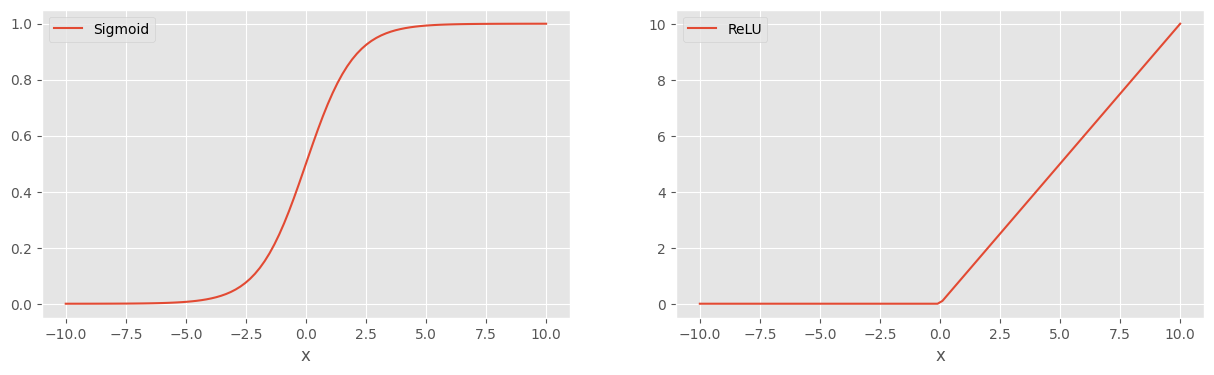

In [231]:
x = torch.linspace(-10, 10, 100)

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(x, relu(x), label='ReLU')
plt.xlabel('x')
plt.legend(loc='upper left');

**(d) Which activation function would you recommend for a network that outputs probabilities, i.e., outputs $\in [0, 1]$? Why?<span style="float:right"> (1 point)</span>**

I'd recommend using the sigmoid activation since it has a range $\in [0,1]$ while Relu has a range $\in [0, \infty]$

### Binary cross-entropy loss

We will use the binary cross-entropy loss to train our network. This loss function is useful for binary classification.

The binary cross-entropy (BCE) is a function of the ground truth label $y \in \{0, 1\}$ and the predicted label $\hat{y} \in [0, 1]$:

\begin{align}
  \ell(y, \hat{y}) &= -(y \log{\hat{y}} + (1-y) \log(1-\hat{y})) \\
\end{align}

The BCE loss is the average of the loss function for all samples in a dataset,

\begin{align}
  L = \frac{1}{N} \sum_{i=1}^N \ell(y_i, \hat{y}_i)
\end{align}

Note: pytorch has a built in function for computing the mean.

**(e) Implement `bce_loss(y, y_hat)`:<span style="float:right"> (1 point)</span>**

In [232]:


def bce_loss(y, y_hat):
    bce = -(y*torch.log(y_hat)+(1-y)*torch.log(1-y_hat))
    return torch.mean(bce)




# try with some random inputs
torch.manual_seed(12345)
y = torch.randint(2, size=(5,))
y_hat = torch.rand(size=(5,))
print('y:', y)
print('y_hat:', y_hat)
print('bce_loss(y, y_hat):', bce_loss(y, y_hat))
print()

# Properties
assert tuple(bce_loss(torch.tensor([1]), torch.tensor([0.123])).shape) == (), "The loss should be a scalar"
assert bce_loss(torch.tensor([1]), torch.tensor([0.123])) == bce_loss(torch.tensor([0]), torch.tensor([1-0.123])), "Flipping the label and prediction should give the same loss"
assert bce_loss(torch.tensor([1,1]), torch.tensor([0.123,0.123])) == bce_loss(torch.tensor([1,1]), torch.tensor([0.123,0.123])), "The loss should be the mean over all samples"

y: tensor([0, 1, 1, 1, 0])
y_hat: tensor([0.1784, 0.3674, 0.5676, 0.3376, 0.2119])
bce_loss(y, y_hat): tensor(0.6176)



**(f) Compute the BCE loss for a perfect prediction. Is this the correct answer? <span style="float:right"> (1 point)</span>**

In [233]:
loss = bce_loss(torch.tensor(0), torch.tensor(1))
print(loss)

# TODO output is Nans?

tensor(inf)


This is not the correct answer. It should not output tensor(inf). When $y=\hat{y} = 1$ the BCE becomes

\begin{align}
    \ell(y, \hat{y}) &= -(y \log{\hat{y}} + (1-y) \log(1-\hat{y})) \\
    \ell(y, \hat{y}) &= -1\log(1)-0\log(0)\\
\end{align}

Mathematically the second term should reduce to 0, however floating point arithmetic is evaluated numerically, not symbollically/analytically. Thus the computer tries to compute $\log(0)$ and fails. This is what causes our problem.

The proper way to implement cross-entropy is to combine it with the logistic sigmoid activation function.
But for now we can use one of two simple ways to fix this issue:
 * Ensure that the predicted probabilities are never exactly 0 or 1. For example by scaling them to the range `[1e-6; 1-1e-6]`.
 * Or use [`torch.where`](https://pytorch.org/docs/stable/generated/torch.where.html) or indexing with `tensor[y==1]`, to implement the loss function as
    
    \begin{align}
      \ell(y, \hat{y}) &= \begin{cases} -\log{\hat{y}} &\text{if } y=1\\ -\log(1-\hat{y}) & \text{if } y=0\end{cases}
    \end{align}
    
   However, due to how torch.where is implemented it can still give problems later on.

**(g) Give an implementation of BCE loss with this issue fixed <span style="float:right"> (1 point)</span>**

In [234]:
def bce_loss(y, y_hat: torch.Tensor):

    before = [0, 1]
    after = [1e-7, 1-1e-7]

    for b, a in zip(before, after):
        y_hat = torch.where(y_hat == b, a, y_hat)

    bce = -(y*torch.log(y_hat)+(1-y)*torch.log(1-y_hat))
    return torch.mean(bce)

# Test bce_loss for perfect predictions
assert bce_loss(torch.tensor([0]), torch.tensor([0])) < 1e-6
assert bce_loss(torch.tensor([1]), torch.tensor([1])) < 1e-6
assert bce_loss(torch.tensor([0]), torch.tensor([1])) > 10
assert bce_loss(torch.tensor([1]), torch.tensor([0])) > 10
# Checks from before should still hold
assert tuple(bce_loss(torch.tensor([1]), torch.tensor([0.123])).shape) == (), "The loss should be a scalar"
assert abs(bce_loss(torch.tensor([1]), torch.tensor([0.123])) - bce_loss(torch.tensor([0]), torch.tensor([1-0.123]))) < 1e-6, "Flipping the label and prediction should give the same loss"
assert bce_loss(torch.tensor([1,1]), torch.tensor([0.123,0.123])) == bce_loss(torch.tensor([1,1]), torch.tensor([0.123,0.123])), "The loss should be the mean over all samples"

## 1.4 Implement a one-layer model (2 points)

We will first implement a simple one-layer model with a sigmoid activation:

Given an input vector $\mathbf{x}$, weight vector $\mathbf{w}$ and bias $b$, compute the output $\hat{y}$:

\begin{align}
\tilde{y} = \mathbf{x} \cdot \mathbf{w} + b \\
\hat{y} = \sigma(\tilde{y}) \\
\end{align}

Hint: in torch inner product and matrix multiplication is denoted as `A @ B`.

**(a) Complete the implementation below:<span style="float:right"> (2 points)</span>**

In [235]:
# initialize parameters
torch.manual_seed(12345)
w = torch.randn(size=(5,))
b = torch.randn(size=[])

# implement the model
def model1(x):
    y_tilde = x@w + b
    y_hat = sigmoid(y_tilde)
    return y_hat

# test with a random input
x = torch.randn(size=(5,))

y_hat = model1(x)
print("y_hat:", y_hat)

assert tuple(y_hat.shape) == (), "There should be one output"

y_hat: tensor(0.0841)


## 1.5 Implement a multi-layer network (5 points)

We are now ready to implement a more general neural network function.
This will follow the "network in one line" from the slides, or eq (6.19) from Bishop.

The `network` function takes an input `x`, and a list of parameters. For each layer the parameters contain weights `w`, biasses `b`, and an activation function `h`.

For each layer, we should compute a linear transformation of the previous layer's output `z`, and then apply the activation function.

The function should work on multiple samples at the same time, so `x` and `z` should be rank 2 tensors.

**(a) Complete the implementation below:<span style="float:right"> (2 points)</span>**

In [236]:
# TODO: read about matrix/tensor rank: https://leimao.github.io/blog/Tensor-Rank-VS-Matrix-Rank/

def network(x: torch.Tensor, params):
    z = x
    for l, (w, b, h) in enumerate(params):
        # Compute z^(l) given z^(l-1)
        z = h(z@w + b)
    # Final output. Note: squeeze removes the last dimension if there is only 1 output
    y = z.squeeze(dim=-1)
    return y

# Test with a simple networks. N=2, D₀=5, D₁=10, D₂=1
torch.manual_seed(12345)
params = [(torch.randn((5,10)), torch.zeros((10,)), relu)
         ,(torch.randn((10,1)), torch.zeros((1,)), sigmoid)]
x = torch.randn((2,5))
y = network(x, params)
print(y)
assert tuple(y.shape) == (2,), "Expected two samples and one output channel"

tensor([0.7187, 0.1632])


For initializing the parameters and describing the network architecture, we can make a helper function.
This function should initialize the parameters for a single layer.

* You should initialize the weights using He initialization. That is: drawn from a normal distribution with the variance as described in the slides.
* You should initialize the biases to zero

**(b) Complete the implementation below:<span style="float:right"> (3 points)</span>**

In [237]:
# TODO: why HE initialization again?
# TODO: why is D = d1 and not d0?
def make_layer(d0, d1, activation):
    """
    Create the parameters for a layer in the neural network, with input size d0, and output size d1.
    Weights are initialized with He initialization.
    Biases are initialized to 0.
    """
    # Choose initialization scale. Use He initialization
    epsilon = torch.sqrt(torch.tensor(2/d1))
    # Initialize weights randomly
    w = torch.normal(torch.zeros(d0,d1), math.pow(epsilon, 2)) 
    # Initialize biases to zero
    b = torch.zeros(d1)
    return (w.double(), b.double(), activation)

# Tests
assert len(make_layer(5, 10, sigmoid)) == 3
assert tuple(make_layer(5, 10, sigmoid)[0].shape) == (5,10), "Weight has the wrong shape"
assert tuple(make_layer(5, 10, sigmoid)[1].shape) == (10,), "Bias has the wrong shape"
assert abs(torch.mean(make_layer(100000, 1, sigmoid)[0]) - 0) < 1e-2, "Weights should have mean 0"
assert abs(torch.std(make_layer(100000, 2, sigmoid)[0]) - 1) < 1e-2, "Scale of the weights is wrong"
assert all(make_layer(1, 100, sigmoid)[1] == 0), "Biases should be zero"

## 1.6 Training the network (17 points)

We load a simple dataset with 360 handwritten digits.

Each sample has $8 \times 8$ pixels, arranged as a 1D vector of 64 features.

We create a binary classification problem with the label 0 for the digits 0 to 4, and 1 for the digits 5 to 9.

digits_x.shape: torch.Size([1797, 64])
digits_y.shape: torch.Size([1797])
min, max values: -0.8117526680606131 1.8474621222310277
labels: tensor([0., 1.], dtype=torch.float64)


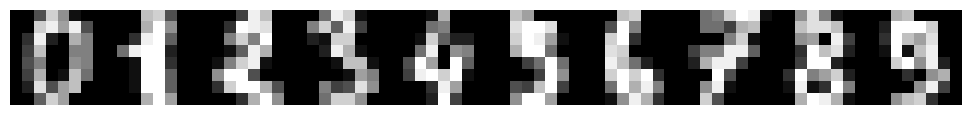

In [238]:
# load the first two classes of the digits dataset
dataset = sklearn.datasets.load_digits()

# create a binary classification problem
digits_x = torch.tensor(dataset['data']).double()
digits_y = torch.tensor(dataset['target'] < 5).double()

# plot some of the digits
plt.figure(figsize=(10, 2))
plt.imshow(np.hstack([digits_x[i].reshape(8, 8) for i in range(10)]), cmap='gray')
plt.grid(False)
plt.tight_layout()
plt.axis('off')

# normalize the values to mean 0, standard deviation 1
digits_x -= torch.mean(digits_x)
digits_x /= torch.std(digits_x)

# print some statistics
print('digits_x.shape:', digits_x.shape)
print('digits_y.shape:', digits_y.shape)
print('min, max values:', torch.min(digits_x).item(), torch.max(digits_x).item())
print('labels:', torch.unique(digits_y))

We divide the dataset in a train and a validation set.

In [239]:
# make a 50%/50% train/validation split
train_prop = 0.5
n_train = int(digits_x.shape[0] * train_prop)

# shuffle the datapoints
torch.manual_seed(12345)
idxs = torch.randperm(digits_x.shape[0])

# take a subset
split_x = {'train': digits_x[idxs[:n_train]],
           'val':   digits_x[idxs[n_train:]]}
split_y = {'train': digits_y[idxs[:n_train]],
           'val':   digits_y[idxs[n_train:]]}

print('Training samples:', split_x['train'].shape[0])
print('Validation samples:', split_x['val'].shape[0])

Training samples: 898
Validation samples: 899


We will now implement a function that trains the network. We will first define some helper functions for working with gradients:

In [240]:
def enable_gradients(params):
    """
    Enable gradient computation for the model parameters.
    """
    for w, b, h in params:
        w.requires_grad_()
        b.requires_grad_()

def add_gradients(params, step):
    """
    Update the parameters: θ ← θ + step * ∇_θ
    """
    with torch.no_grad():
        for w, b, h in params:
            if any(w.grad.flatten().isnan()) or any(b.grad.flatten().isnan()):
                raise Exception("Gradients are nan, something went wrong")
            w += step * w.grad
            b += step * b.grad

def clear_gradients(params):
    """
    Reset the computed gradients.
    """
    for w, b, h in params:
        w.grad = None
        b.grad = None

Next we will implement a function that evaluates the performance on the validation set:

**(a) Complete the code below: <span style="float:right"> (2 points)</span>**

In [241]:
def accuracy(y, y_hat):
    """Compute accuracy"""
    return torch.mean(((y > 0.5) == (y_hat > 0.5)).float())

def evaluate(params, x, y):
    """
    Evaluate the performance of the network.
    Returns: loss and accuracy.
    """
    with torch.no_grad(): # tells torch we don't need gradients
        # TODO: compute y_hat, bce_loss, and accuracy

        y_hat = network(x, params)
        loss  = bce_loss(y,y_hat)
        acc   = accuracy(y, y_hat)
        return loss.item(), acc.item()

**(b) Run the code below to compute the loss and accuracy of an untrained network: <span style="float:right"> (no points)</span>**

In [242]:
# Initialize parameters
params = [
    make_layer(64, 32, relu),
    make_layer(32, 1, sigmoid),
]
evaluate(params, split_x['val'], split_y['val'])

(1.1735130540500252, 0.5895439386367798)

Now we can define a training loop. 

For each epoch, the function `fit` loops over all minibatches in the training set and updates the network parameters. It will then compute the loss and accuracy for the validation samples. Finally, it will plot the learning curves.

The actual training happens in `train_epoch`. There is still some work to be done there.

**(c) Complete the code below: <span style="float:right"> (5 points)</span>**

In [243]:
def train_epoch(params, x_train, y_train, learning_rate, batch_size):
    """
    One epoch of training with gradient descent
    """
    n = len(x_train)
    if batch_size is None or batch_size > n:
        batch_size = n
    num_batches = n // batch_size
    # randomize the order in which we see the samples
    random_order = torch.randperm(n)
    # keep tarck of the loss and accuracy
    loss_total = 0
    accuracy_total = 0

    for step in range(num_batches):
        # Get a minibatch
        x_batch = x_train[random_order[step*batch_size : (step+1)*batch_size]]
        y_batch = y_train[random_order[step*batch_size : (step+1)*batch_size]]
        
        # Compute loss and update parameters
        #  * clear gradients
        clear_gradients(params)
        #  * compute output of network for this batch
        y_hat = network(x_batch, params)
        #  * compute loss and accuracy
        loss = bce_loss(y_batch, y_hat)
        acc = accuracy(y_batch, y_hat)
        #  * compute new gradients
        loss.backward()
        #  * update the parameters
        add_gradients(params, learning_rate)
        
        loss_total += loss.item()
        accuracy_total += acc.item()
        
    return loss_total / num_batches, accuracy_total / num_batches


def fit(params, x, y, learning_rate, batch_size, epochs=25):
    """
    Optimize the the parameters with gradient descent
    """
    # Initialize the loss and accuracy history
    loss_hist = {'train': [], 'val': []}
    accuracy_hist = {'train': [], 'val': []}
    
    # Enable gradients for the parameters
    enable_gradients(params)
    
    for epoch in range(epochs):
        # Training
        train_loss, train_acc = train_epoch(params, x['train'], y['train'], learning_rate, batch_size)
        loss_hist['train'].append(train_loss)
        accuracy_hist['train'].append(train_acc)
        
        # Validation
        test_loss, test_acc = evaluate(params, x['val'], y['val'])
        loss_hist['val'].append(test_loss)
        accuracy_hist['val'].append(test_acc)

        #print(f'Epoch {epoch:3}: train loss {train_loss:.3f}, acc {train_acc:.3f};  validation loss {test_loss:.3f}, acc {test_acc:.3f}')
    
    # Print final results
    print(f'Epochs: {epochs}, Learning Rate: {learning_rate}, Batch size: {batch_size}')
    print(f'After {epochs} epochs')
    print(f'  train      loss {train_loss:.3f}, accuracy {train_acc:.3f}')
    print(f'  validation loss {test_loss:.3f}, accuracy {test_acc:.3f}')

    # Plot the learning curves
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    for phase in loss_hist:
        plt.plot(loss_hist[phase], label=phase)
    plt.title('BCE loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    for phase in accuracy_hist:
        plt.plot(accuracy_hist[phase], label=phase)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

We will define a two-layer network:
* A layer that maps the 64 features of the input to 32 features.
* A ReLU activation function.
* A layer that maps the 32 features to the 1 output features.
* A sigmoid activation function that maps the output to [0, 1].

**(d) Train the network and inspect the results. Tune the hyperparameters to get a good result.<span style="float:right"> (1 point)</span>**

(Hint: it is possible to get validation accuracy >= 0.95)

Epochs: 10, Learning Rate: -0.3, Batch size: 10
After 10 epochs
  train      loss 0.035, accuracy 0.988
  validation loss 0.096, accuracy 0.968


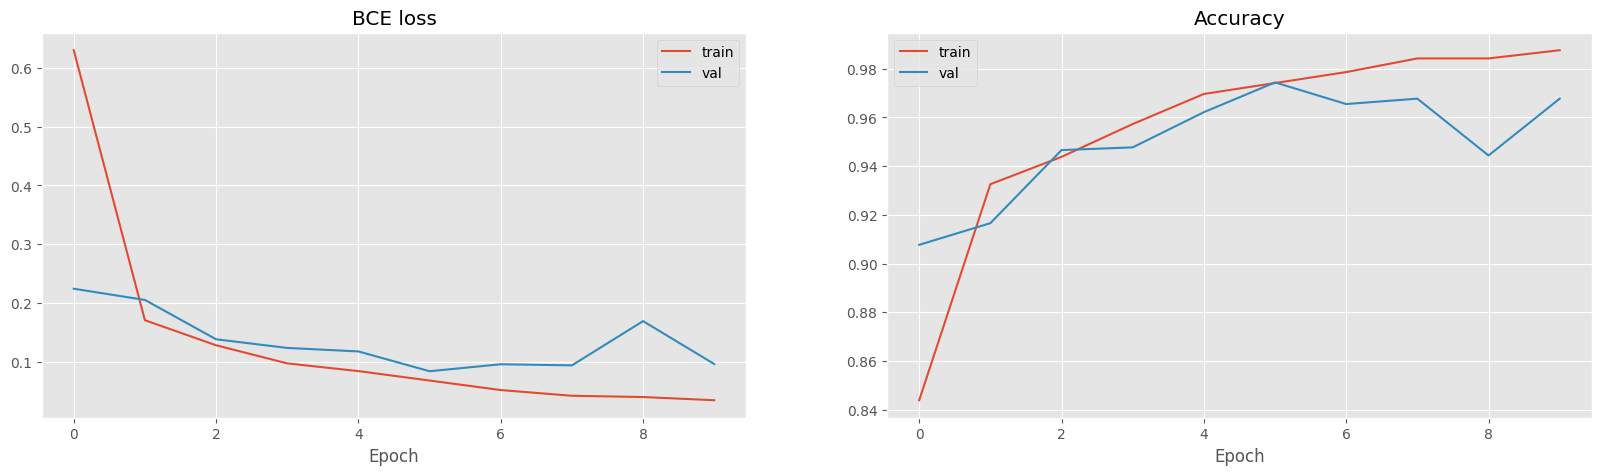

Epochs: 10, Learning Rate: -0.3, Batch size: 60
After 10 epochs
  train      loss 0.193, accuracy 0.920
  validation loss 0.181, accuracy 0.933


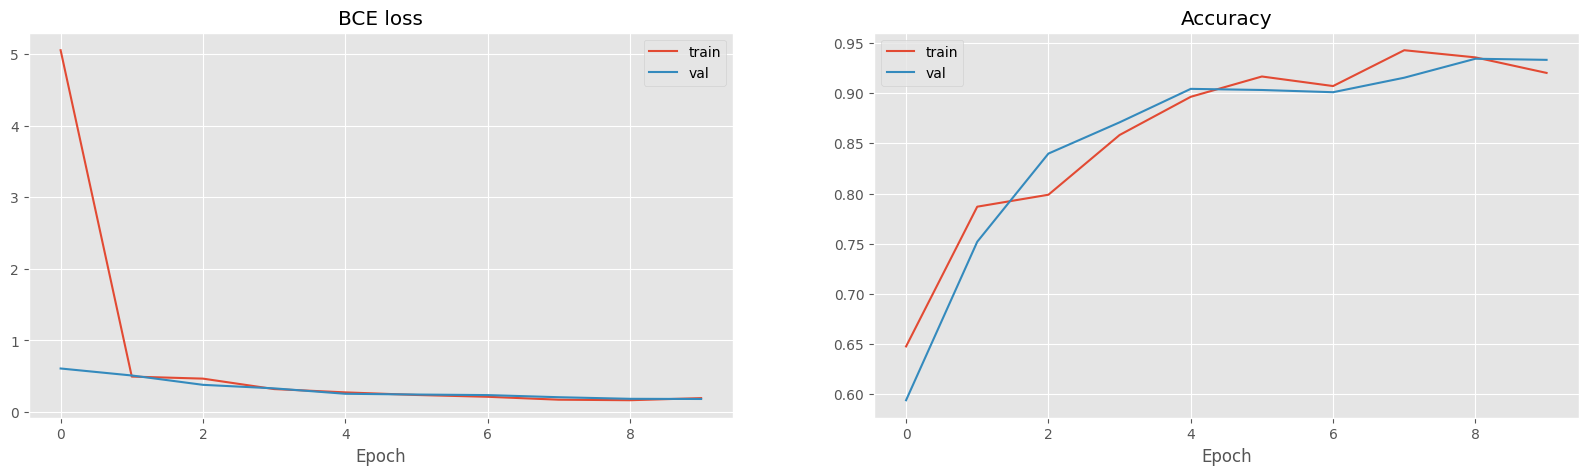

Epochs: 10, Learning Rate: -0.19999999999999998, Batch size: 10
After 10 epochs
  train      loss 0.030, accuracy 0.990
  validation loss 0.107, accuracy 0.953


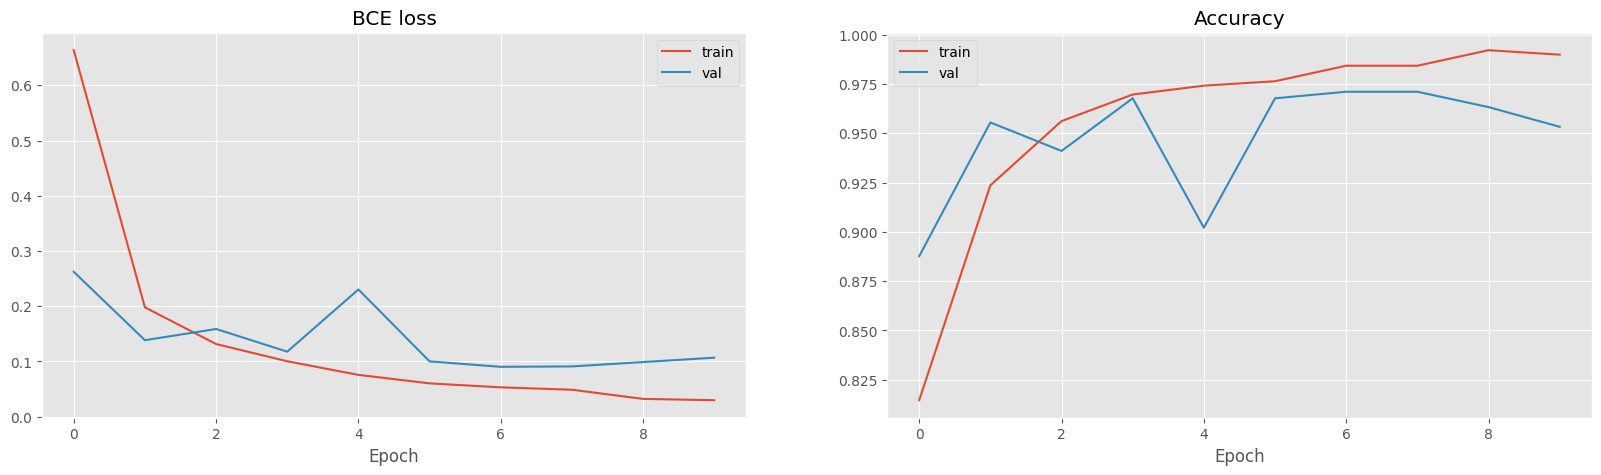

Epochs: 10, Learning Rate: -0.19999999999999998, Batch size: 60
After 10 epochs
  train      loss 0.105, accuracy 0.964
  validation loss 0.151, accuracy 0.944


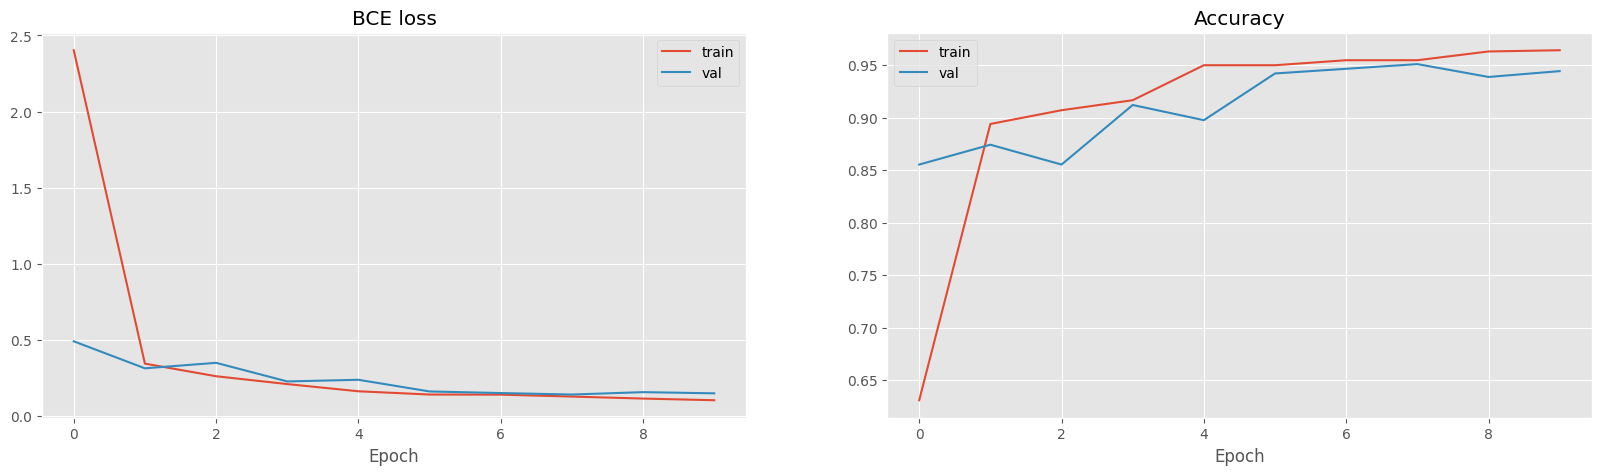

Epochs: 60, Learning Rate: -0.3, Batch size: 10
After 60 epochs
  train      loss 0.000, accuracy 1.000
  validation loss 0.103, accuracy 0.978


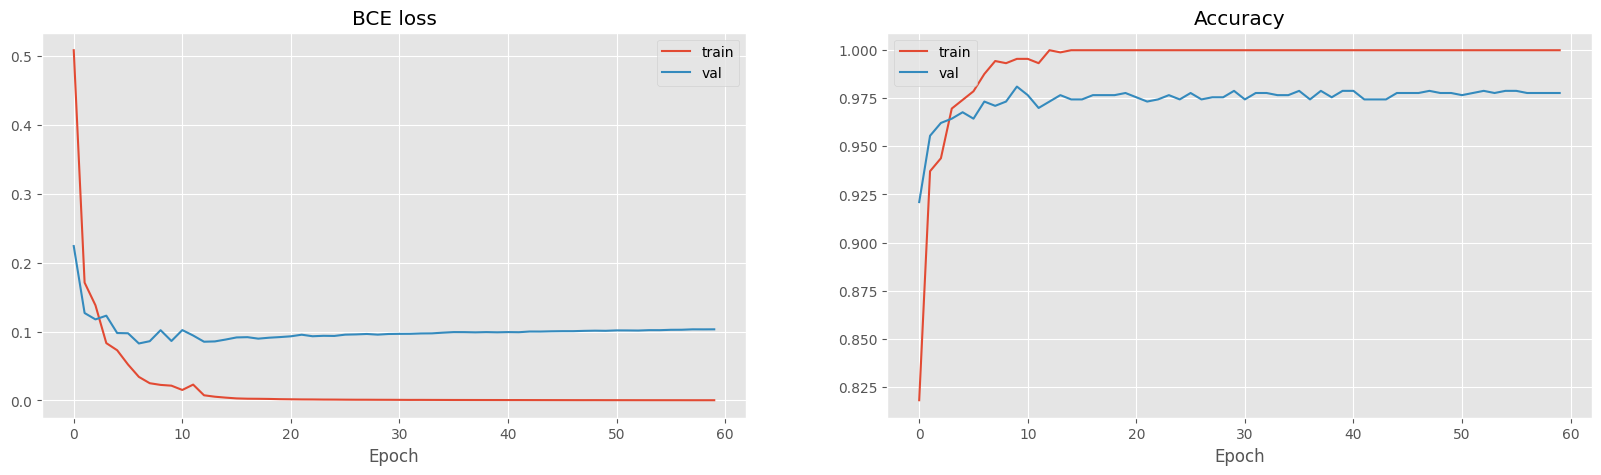

Epochs: 60, Learning Rate: -0.3, Batch size: 60
After 60 epochs
  train      loss 0.005, accuracy 1.000
  validation loss 0.086, accuracy 0.972


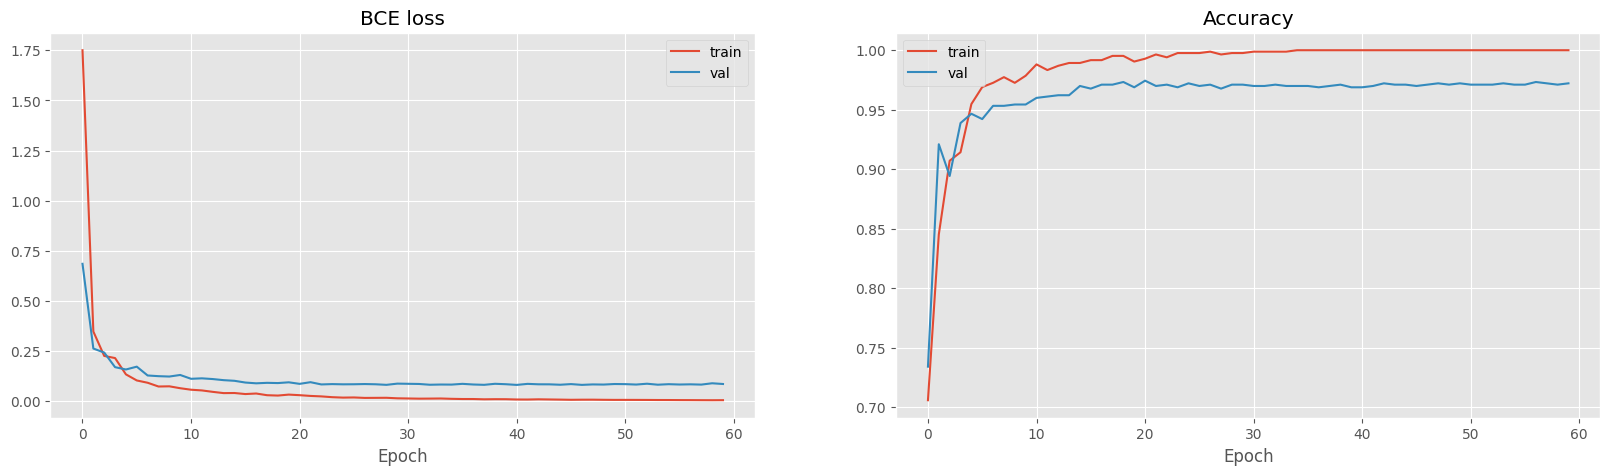

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x749090bd5d00>>
Traceback (most recent call last):
  File "/home/andrew/Documents/School/Semester 3/DL/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 794, in _clean_thread_parent_frames
    for identity in list(thread_to_parent_header.keys()):
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 


Epochs: 60, Learning Rate: -0.19999999999999998, Batch size: 10
After 60 epochs
  train      loss 0.001, accuracy 1.000
  validation loss 0.096, accuracy 0.978


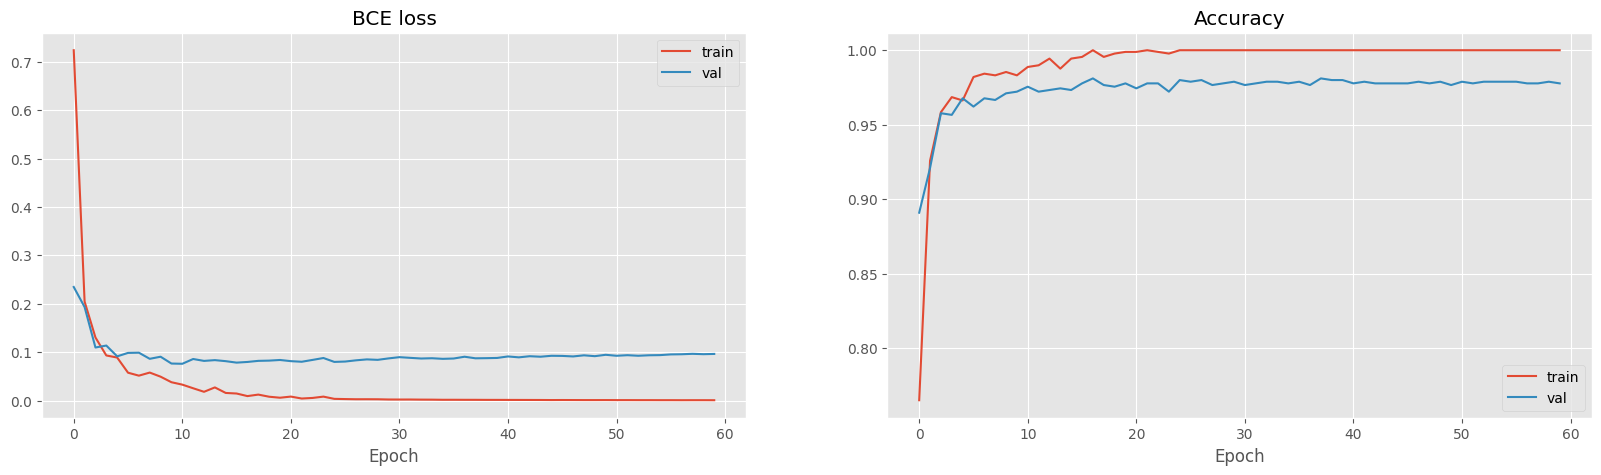

Epochs: 60, Learning Rate: -0.19999999999999998, Batch size: 60
After 60 epochs
  train      loss 0.015, accuracy 0.998
  validation loss 0.093, accuracy 0.971


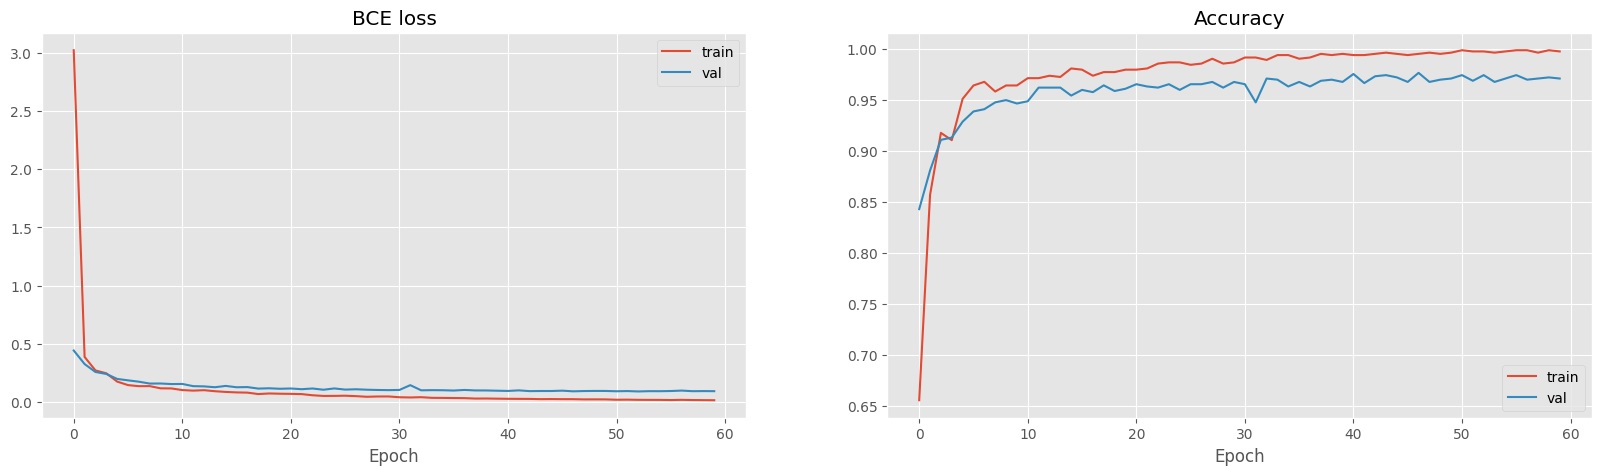

In [244]:
# Initialize parameters

# TODO: tune the hyperparameters


epoch_list = np.arange(10, 110, 50) # 90
learning_rate_list = np.arange(-0.3, -0.1, 0.1) #-0.3
batch_size_list = np.arange(10, 110, 50) # 70

for epochs in epoch_list:
    for learning_rate in learning_rate_list:
        for batch_size in batch_size_list:

            params = [
            make_layer(64, 32, relu),
            make_layer(32, 1, sigmoid),
            ]

            fit(params, split_x, split_y,
            epochs = epochs,
            learning_rate = learning_rate,
            batch_size = batch_size)

# Note: add more cells below if you want to keep runs with different hyperparameters. Make sure to also copy the initialization.

**(e) How did each of the hyperparameters (number of epochs, learning rate, minibatch size) influence your results? How important is it to set each correctly?<span style="float:right"> (3 points)</span>**

There is usually a minimum number of epochs required for the loss to level out for a particular setting of learning rate and minimatch size. The smaller the learning rate the greater the number of epochs required to reach this point.

The gradients used to update the weights in each batch size are more stable and representative the larger the batch size - this means that for a larger batch size you can typically also use a larger learning rate. A smaller batch size is more noisy and thus can lead to instability in the training if paired with a large learning rate, however because a smaller batch size is noisier this can allow the process to escape from local minima more easily than larger less noisy batch sizes. 

**(f) Create and train a network with a single layer with sigmoid activation:<span style="float:right"> (1 point)</span>**

Epochs: 90, Learning Rate: -0.3, Batch size: 70
After 90 epochs
  train      loss 0.260, accuracy 0.911
  validation loss 0.353, accuracy 0.877


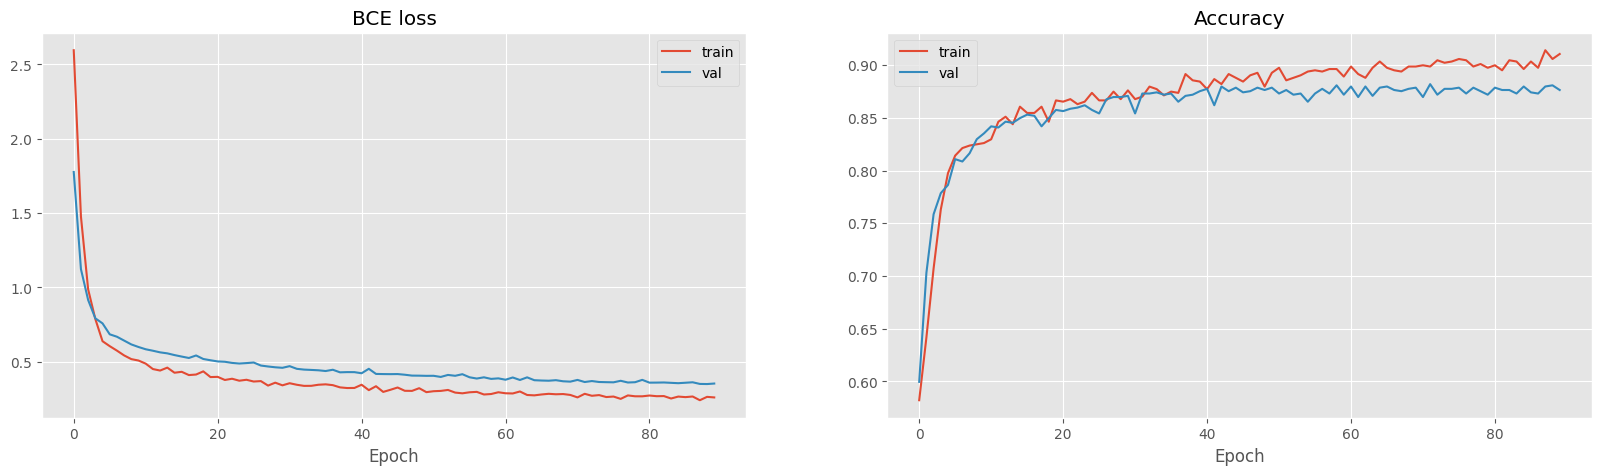

In [204]:
params = [
make_layer(64, 1, sigmoid),
]

fit(params, split_x, split_y,
epochs = 90,
learning_rate = -0.3,
batch_size = 70)

**(g) Discuss your results. Compare the results of this single-layer network with those of the network you trained before.<span style="float:right"> (1 point)</span>**

**Two Layer Network**  
Epochs: 90, Learning Rate: -0.2999999999999998, Batch size: 70  
After 90 epochs  
  train      loss 0.005, accuracy 0.999  
  validation loss 0.074, accuracy 0.982  

**Single Layer Network**  
Epochs: 90, Learning Rate: -0.3, Batch size: 70  
After 90 epochs  
  train      loss 0.259, accuracy 0.899  
  validation loss 0.344, accuracy 0.883

Using the same hyperparameters the two layer network outperforms the single layer network by about 10% better accuracy

**(h) Repeat the experiment with a network with two linear layers, without an activation function in between, followed by a sigmoid activation.<span style="float:right"> (1 point)</span>**

You can make a layer without an activation function by using the identity function as the activation function: `lambda x: x`.

Epochs: 90, Learning Rate: -0.2, Batch size: 70
After 90 epochs
  train      loss 0.239, accuracy 0.912
  validation loss 0.305, accuracy 0.885


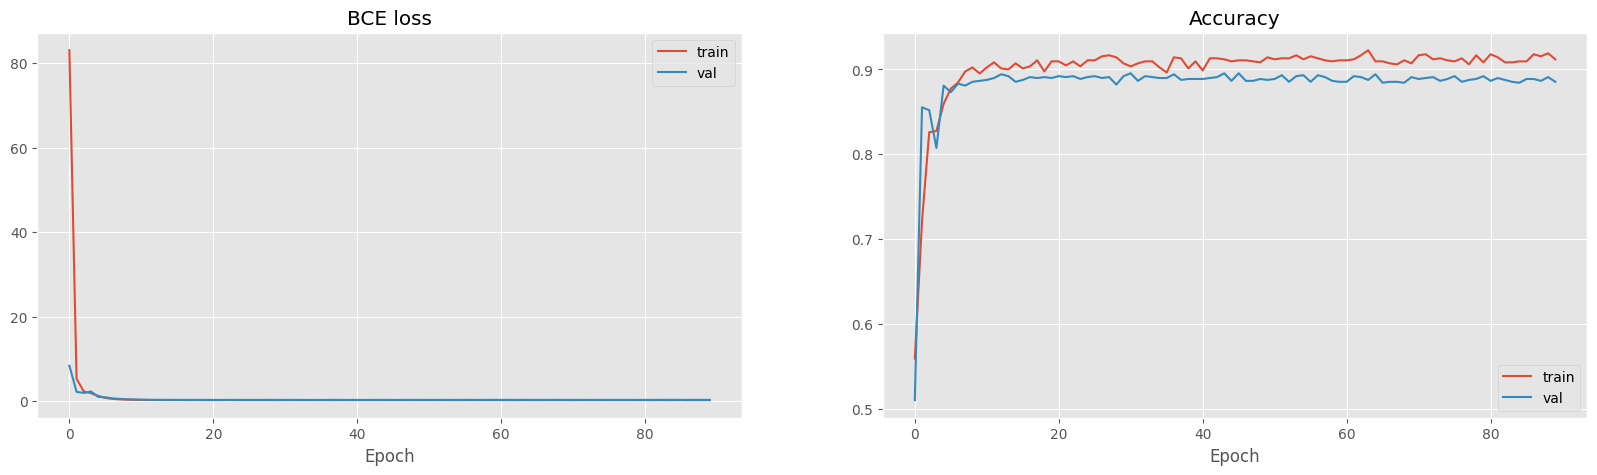

In [205]:
params = [
make_layer(64, 32, lambda x: x),
make_layer(32, 1, sigmoid),
]

fit(params, split_x, split_y,
epochs = 90,
learning_rate = -0.2,
batch_size = 70)

**(i) How does the performance of this network compare with the previous networks. Can you explain this result? What is the influence of the activation functions in the network?<span style="float:right"> (1 point)</span>**

Epochs: 90, Learning Rate: -0.2, Batch size: 70  
After 90 epochs  
  train      loss 0.228, accuracy 0.912  
  validation loss 0.297, accuracy 0.888  

This network performs about as well as the single layer network which is expected since, without a non-linear activation after the first layer, it is mathematically equivalent to a single layer network.

**(j) One way to improve the performance of a neural network is by increasing the number of layers. Try a deeper network (e.g., a network with four layers) to see if this outperforms the previous networks.<span style="float:right"> (1 point)</span>**

Epochs: 100, Learning Rate: -0.1, Batch size: 70
After 100 epochs
  train      loss 0.001, accuracy 1.000
  validation loss 0.098, accuracy 0.978


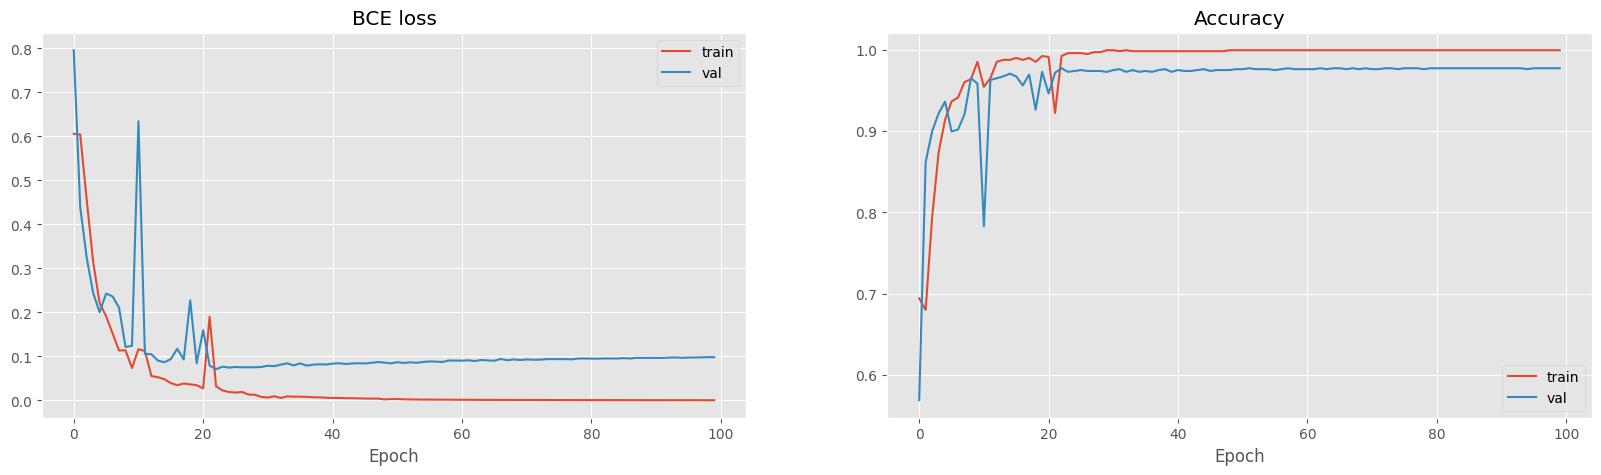

In [206]:
params = [
make_layer(64, 32, relu),
make_layer(32, 16, relu),
make_layer(16, 8, relu),
make_layer(8, 1, sigmoid),
]

fit(params, split_x, split_y,
epochs = 100,
learning_rate = -0.1,
batch_size = 70)

**(k) Discuss your findings. Were you able to obtain a perfect classification? Explain the learning curves.<span style="float:right"> (1 point)</span>**

With the four layer network I was able to achieve a perfect training score, and a very good test score at 98%. The learning curves suggest that it may not have been necessary for me to train for 100 epochs since learning seems to stop just have epoch 20. Notice how the loss is always higher for validation and the accuracy is lower for validation.

## 1.7 Final questions (6 points)

You now have some experience training neural networks. Time for a few final questions.

**(a) What is the influence of the learning rate? What happens if the learning rate is too low or too high?<span style="float:right"> (2 points)</span>**

If the learning rate is too low the network learns very slowly and may not converge in the given number of epochs. If the learning rate is too high then we may oscillate around the minimum and never converge. 

**(b) What is the role of the minibatch size in SGD? Explain the downsides of a minibatch size that is too small or too high.<span style="float:right"> (2 points)</span>**

In gradient descent, the whole batch of data is processed every time we update the gradients which can have adverse side effects of the batch is very large and does not fit into memory, additionally one may get trapped in a local minima. With online-gradient descent or stochastic gradient descent with a batch size of 1, we don't have to worry about fitting the entire batch into memory at once. However, a batch size of 1 is very noisy and can thus mean we are not moving in down the gradient landscape as quickly as we'd like. To fix these problems we use an intermediate batch size that ideally avoids both extremes. 

**(c) In the linear layer, we initialized the weights $w$ with random values, but we initialized the bias $b$ with zeros. What would happen if the weights $w$ were initialised as zeros? Why is this not a problem for the bias?<span style="float:right"> (2 points)</span>**

If we initialized the weights $w$ as zero we would not be breaking symmetry. All nodes in the network would compute the same thing and would be redundent so we must initialize from some distribution to break the symmetry. The output of a network is $y = x\cdot w + b$ so if $w$ is zero then it it multiplies into $x$ and sets the whole first term to zero. $b$ is just a constant term that is added and thus would not cause symmetry that needs to be broken.  

## The end

Well done! Please double check the instructions at the top before you submit your results.

*This assignment has 42 points.*
<span style="float:right;color:#aaa;font-size:10px;"> Version cba1c5e / 2024-09-05</span>